In [ ]:
pip install pycaret

In [1]:
import pycaret
pycaret.__version__

'3.3.2'

In [3]:
import sys
print(sys.version)

3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv("Fraud Detection Dataset.csv")

In [6]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [8]:
df.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [9]:
df.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

In [10]:
df = df.dropna(subset=['Transaction_Amount', 'Device_Used','Location', 'Time_of_Transaction', 'Payment_Method'])

In [11]:
df['Transaction_Amount'].unique()

array([1292.76, 1554.58,  100.1 , ..., 2446.65, 2867.43, 4277.64])

In [12]:
df = df.drop('Transaction_ID', axis=1)

In [13]:
ignore_features=['Transaction_ID']


In [14]:
df = df.drop('User_ID', axis=1)

In [15]:
# import pycaret classifciation and init setup his single line imports all the required functionalities for classification tasks in PyCaret, including setup(), compare_models(), create_model(), tune_model(), predict_model()
import numpy as np
from pycaret.classification import *
main = setup(df, target = 'Fraudulent', session_id = 123,
            
    
    # MinMax scaling (0-1 normalization)
    normalize = True,
    normalize_method = 'minmax', 
    
    # Automatic encoding (OHE for <=25 categories)
    categorical_features = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method'],  
    max_encoding_ohe = 25, 
    
    # SMOTE oversampling
    fix_imbalance = True, 
    fix_imbalance_method = 'SMOTE',  # Explicit SMOTE 
             
           #missing values
             imputation_type = 'simple',
             numeric_imputation = 'mean',
             categorical_imputation = 'constant' #fills with 'not available'
             
    )

,Description,Value
0,Session id,123
1,Target,Fraudulent
2,Target type,Binary
3,Original data shape,"(39583, 10)"
4,Transformed data shape,"(64587, 28)"
5,Transformed train set shape,"(52712, 28)"
6,Transformed test set shape,"(11875, 28)"
7,Numeric features,5
8,Categorical features,4
9,Preprocess,True


In [16]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [17]:
# init setup on exp --preffered native method 
exp.setup(df, target = 'Fraudulent', session_id = 123,)

,Description,Value
0,Session id,123
1,Target,Fraudulent
2,Target type,Binary
3,Original data shape,"(39583, 10)"
4,Transformed data shape,"(39583, 28)"
5,Transformed train set shape,"(27708, 28)"
6,Transformed test set shape,"(11875, 28)"
7,Numeric features,5
8,Categorical features,4
9,Preprocess,True


In [18]:
#using get_config to get transformed training and test data
X_train_transformed = get_config('X_train')
X_test_transformed = get_config('X_test')

In [19]:
# compare baseline models
best = compare_models(sort='Recall') #we are prioritizing Recall as our optimzer

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.4848,0.5034,0.5030,0.0476,0.0864,-0.0024,-0.0062,0.2890
ridge,Ridge Classifier,0.5313,0.5007,0.4689,0.0492,0.0890,0.0008,0.0015,0.1600
lda,Linear Discriminant Analysis,0.5313,0.5007,0.4689,0.0492,0.0890,0.0008,0.0015,0.2050
lr,Logistic Regression,0.5317,0.5010,0.4682,0.0492,0.0890,0.0007,0.0014,1.7920
qda,Quadratic Discriminant Analysis,0.6777,0.5072,0.2994,0.0501,0.0831,0.0016,-0.0002,0.1760
nb,Naive Bayes,0.7810,0.5034,0.1908,0.0500,0.0790,0.0017,0.0017,0.2290
knn,K Neighbors Classifier,0.8370,0.5012,0.1235,0.0481,0.0691,-0.0013,-0.0016,1.5720
dt,Decision Tree Classifier,0.8955,0.5111,0.0851,0.0651,0.0737,0.0194,0.0196,0.2910
et,Extra Trees Classifier,0.9506,0.5159,0.0252,0.3858,0.0471,0.0416,0.0882,1.8770
rf,Random Forest Classifier,0.9523,0.5184,0.0244,0.9333,0.0473,0.0450,0.1426,1.9360


In [20]:
svm_model = create_model('svm', fold=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8131,0.4980,0.1324,0.0431,0.0650,-0.0098,-0.0117
1,0.4004,0.4663,0.5441,0.0442,0.0818,-0.0099,-0.0278
2,0.8680,0.5108,0.0588,0.0325,0.0419,-0.0227,-0.0239
3,0.5224,0.5168,0.4412,0.0459,0.0831,-0.0063,-0.0140
4,0.5693,0.5178,0.4412,0.0509,0.0913,0.0037,0.0074
5,0.3074,0.4947,0.7353,0.0504,0.0943,0.0028,0.0099
6,0.3009,0.5029,0.6765,0.0463,0.0867,-0.0056,-0.0201
7,0.6212,0.4952,0.3529,0.0475,0.0838,-0.0030,-0.0054
8,0.4065,0.4959,0.5672,0.0457,0.0846,-0.0054,-0.0151


In [21]:
#lets train a svm with 5 folds
svm_model = create_model('svm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4074,0.5048,0.6185,0.0499,0.0923,0.0024,0.0067
1,0.4511,0.5092,0.5646,0.0497,0.0914,0.0017,0.0043
2,0.5462,0.4931,0.4280,0.0468,0.0845,-0.0041,-0.0085
3,0.3461,0.4971,0.6963,0.0504,0.0940,0.0035,0.0112
4,0.5587,0.5060,0.4704,0.0523,0.0941,0.0070,0.0146
Mean,0.4619,0.5020,0.5556,0.0498,0.0913,0.0021,0.0056
Std,0.0812,0.0060,0.0973,0.0017,0.0036,0.0036,0.0079


In [22]:
#training model and returning traing score
svm_model = create_model('svm', return_train_score=True)

In [23]:
# change the probability threshold of classifier from 0.5 to 0.66
create_model('svm', fold=5, probability_threshold = 0.66)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4074,0.5048,0.6185,0.0499,0.0923,0.0024,0.0067
1,0.4511,0.5092,0.5646,0.0497,0.0914,0.0017,0.0043
2,0.5462,0.4931,0.4280,0.0468,0.0845,-0.0041,-0.0085
3,0.3461,0.4971,0.6963,0.0504,0.0940,0.0035,0.0112
4,0.5587,0.5060,0.4704,0.0523,0.0941,0.0070,0.0146
Mean,0.4619,0.5020,0.5556,0.0498,0.0913,0.0021,0.0056
Std,0.0812,0.0060,0.0973,0.0017,0.0036,0.0036,0.0079


CustomProbabilityThresholdClassifier(alpha=0.0001, average=False,
                                     class_weight=None,
                                     classifier=SGDClassifier(alpha=0.0001,
                                                              average=False,
                                                              class_weight=None,
                                                              early_stopping=False,
                                                              epsilon=0.1,
                                                              eta0=0.001,
                                                              fit_intercept=True,
                                                              l1_ratio=0.15,
                                                              learning_rate='optimal',
                                                              loss='hinge',
                                                              max_iter=1000,
                                                              n_iter_no_change=5,
                                                              n_jobs=-1,
                                                              penalty='l2',
                                                              power_t=0.5,
                                                              random_state=123...
                                                              validation_fraction=0.1,
                                                              verbose=0,
                                                              warm_start=False),
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.001, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     probability_threshold=0.66,
                                     random_state=123, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False)

In [24]:
tunedSvmModel = tune_model(svm_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9513,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9513,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9513,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9513,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9513,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9513,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9509,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9509,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9513,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [25]:
#lets try tuning with different parameters
tunedsvm = tune_model(svm_model, optimize='Recall', early_stopping=True, n_iter=50, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0487,0.5000,1.0000,0.0487,0.0929,0.0000,0.0000
1,0.0487,0.5000,1.0000,0.0487,0.0929,0.0000,0.0000
2,0.9513,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9513,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0487,0.5000,1.0000,0.0487,0.0929,0.0000,0.0000
5,0.0487,0.5000,1.0000,0.0487,0.0929,0.0000,0.0000
6,0.0491,0.5000,1.0000,0.0491,0.0936,0.0000,0.0000
7,0.0491,0.5000,1.0000,0.0491,0.0936,0.0000,0.0000
8,0.0487,0.5000,1.0000,0.0487,0.0929,0.0000,0.0000


Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [26]:
#lets try tuning with 20 iteration 
tunedsvm2 = tune_model(svm_model, optimize='Recall', early_stopping=True, n_iter=20, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3028,0.4837,0.6963,0.0474,0.0887,-0.0028,-0.0101
1,0.3555,0.4808,0.6148,0.0457,0.0850,-0.0062,-0.0195
2,0.2775,0.5291,0.8370,0.0540,0.1014,0.0109,0.0430
3,0.1869,0.4746,0.8148,0.0470,0.0890,-0.0035,-0.0180
4,0.2324,0.5011,0.7778,0.0477,0.0899,-0.0021,-0.0095
5,0.3663,0.4624,0.6222,0.0470,0.0873,-0.0036,-0.0111
6,0.2595,0.5360,0.7941,0.0507,0.0952,0.0033,0.0133
7,0.3197,0.4797,0.6618,0.0467,0.0872,-0.0050,-0.0170
8,0.2079,0.5266,0.8222,0.0487,0.0919,-0.0002,-0.0007


Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [27]:
#ets tune using optuna with 30 iterations
#tunedsvm2 = tune_model(svm_model, search_library = 'optuna', optimize='Recall', early_stopping=True, n_iter=30, choose_better=True)

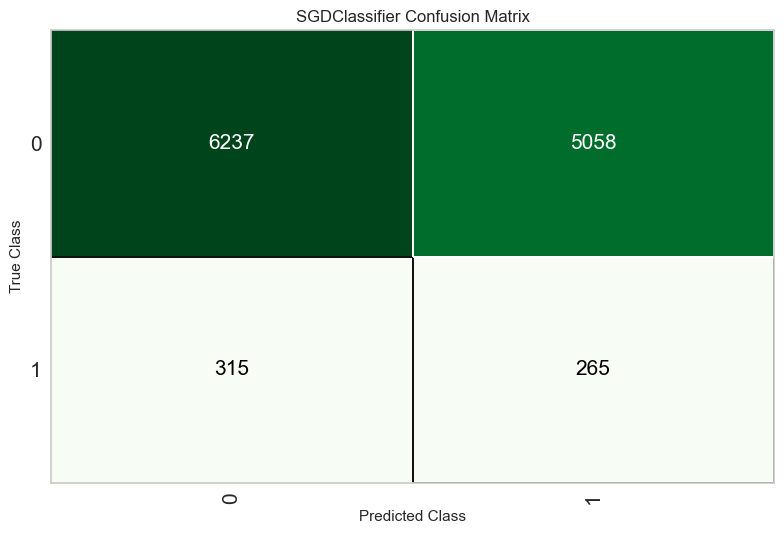

In [28]:
#lets evaluate the model 
# plot confusion matrix
plot_model(svm_model, plot = 'confusion_matrix')

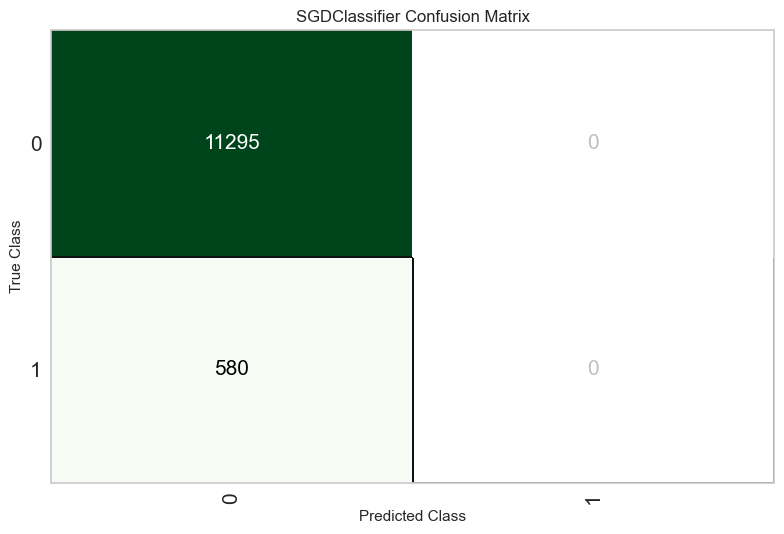

In [29]:
#lets compare the confusion matrix with the tunedSvm model
plot_model(tunedsvm, plot = 'confusion_matrix')

In [30]:
best #shows the best model and its underlying parameters

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
evaluate_model(svm_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [32]:
#interpret_model(tunedsvm, plot = 'reason', obervation = 0)

In [33]:
#lets create a logistic classifier model

In [34]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5218,0.4960,0.5037,0.0513,0.0931,0.0051,0.0114
1,0.5276,0.5025,0.4370,0.0457,0.0827,-0.0061,-0.0133
2,0.5594,0.5208,0.4667,0.0520,0.0935,0.0064,0.0134
3,0.5229,0.4697,0.4889,0.0500,0.0908,0.0026,0.0058
4,0.5291,0.5055,0.4667,0.0486,0.0881,-0.0002,-0.0005
5,0.5298,0.4776,0.4000,0.0423,0.0765,-0.0127,-0.0275
6,0.5485,0.5393,0.5221,0.0565,0.1019,0.0147,0.0312
7,0.5323,0.5005,0.4559,0.0483,0.0873,-0.0016,-0.0034
8,0.5361,0.5201,0.5037,0.0529,0.0957,0.0082,0.0179


In [35]:
#let try with 30 folds
lr = create_model('lr', fold=30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5162,0.5329,0.5556,0.0553,0.1006,0.0132,0.0300
1,0.5281,0.4163,0.3111,0.0334,0.0603,-0.0303,-0.0647
2,0.4989,0.4816,0.4667,0.0457,0.0832,-0.0061,-0.0141
3,0.5130,0.5157,0.5333,0.0530,0.0964,0.0085,0.0195
4,0.5260,0.5156,0.4444,0.0462,0.0837,-0.0050,-0.0110
5,0.5087,0.5491,0.6222,0.0602,0.1098,0.0230,0.0538
6,0.5422,0.5447,0.5111,0.0542,0.0981,0.0110,0.0237
7,0.5346,0.4906,0.4444,0.0471,0.0851,-0.0033,-0.0070
8,0.5400,0.5073,0.4000,0.0433,0.0781,-0.0107,-0.0228


In [36]:
#how about 5 folds lets try it out
lr = create_model('lr', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5231,0.5060,0.4815,0.0494,0.0896,0.0013,0.0029
1,0.5314,0.4951,0.4465,0.0471,0.0852,-0.0035,-0.0077
2,0.5269,0.4948,0.4465,0.0467,0.0845,-0.0044,-0.0097
3,0.5333,0.5071,0.4741,0.0498,0.0901,0.0021,0.0045
4,0.5086,0.5097,0.5074,0.0502,0.0914,0.0030,0.0069
Mean,0.5246,0.5025,0.4712,0.0486,0.0882,-0.0003,-0.0006
Std,0.0088,0.0063,0.0230,0.0015,0.0028,0.0031,0.0067


In [37]:
#lets tune the model
tunedlr = tune_model(lr) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5218,0.4956,0.5037,0.0513,0.0931,0.0051,0.0114
1,0.5269,0.5025,0.4296,0.0449,0.0813,-0.0076,-0.0166
2,0.5608,0.5207,0.4667,0.0522,0.0938,0.0068,0.0140
3,0.5218,0.4702,0.4889,0.0499,0.0906,0.0024,0.0053
4,0.5309,0.5055,0.4741,0.0495,0.0896,0.0015,0.0034
5,0.5305,0.4770,0.4000,0.0424,0.0767,-0.0126,-0.0271
6,0.5496,0.5393,0.5221,0.0566,0.1022,0.0149,0.0317
7,0.5327,0.5002,0.4559,0.0483,0.0874,-0.0015,-0.0032
8,0.5365,0.5204,0.5037,0.0529,0.0958,0.0083,0.0181


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [38]:
#lets tune with 50 interations
tunedlr = tune_model(lr, n_iter=50, early_stopping=True, optimize = 'Recall', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5218,0.4960,0.5037,0.0513,0.0931,0.0051,0.0114
1,0.5276,0.5025,0.4370,0.0457,0.0827,-0.0061,-0.0133
2,0.5594,0.5208,0.4667,0.0520,0.0935,0.0064,0.0134
3,0.5229,0.4696,0.4889,0.0500,0.0908,0.0026,0.0058
4,0.5291,0.5055,0.4667,0.0486,0.0881,-0.0002,-0.0005
5,0.5298,0.4776,0.4000,0.0423,0.0765,-0.0127,-0.0275
6,0.5485,0.5393,0.5221,0.0565,0.1019,0.0147,0.0312
7,0.5323,0.5005,0.4559,0.0483,0.0873,-0.0016,-0.0034
8,0.5361,0.5201,0.5037,0.0529,0.0957,0.0082,0.0179


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [39]:
#lets tune with 100 interations
tunedlr = tune_model(lr, n_iter=100, early_stopping=True, optimize = 'Recall', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5218,0.4960,0.5037,0.0513,0.0931,0.0051,0.0114
1,0.5276,0.5025,0.4370,0.0457,0.0827,-0.0061,-0.0133
2,0.5594,0.5208,0.4667,0.0520,0.0935,0.0064,0.0134
3,0.5229,0.4696,0.4889,0.0500,0.0908,0.0026,0.0058
4,0.5291,0.5055,0.4667,0.0486,0.0881,-0.0002,-0.0005
5,0.5298,0.4776,0.4000,0.0423,0.0765,-0.0127,-0.0275
6,0.5485,0.5393,0.5221,0.0565,0.1019,0.0147,0.0312
7,0.5323,0.5005,0.4559,0.0483,0.0873,-0.0016,-0.0034
8,0.5361,0.5201,0.5037,0.0529,0.0957,0.0082,0.0179


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


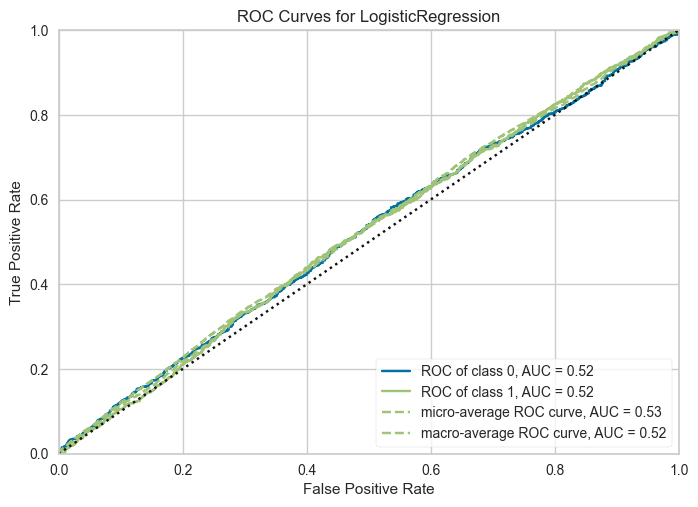

In [40]:
plot_model(lr, plot='auc')

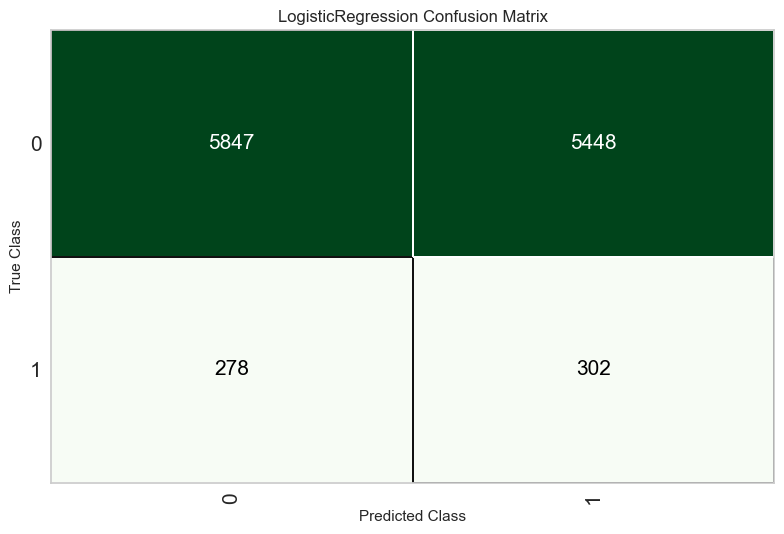

In [41]:
plot_model(lr, plot='confusion_matrix')

In [42]:
#LETS ENSEMBLE MODEL USING BAGGING
ensemble_model(lr, method= 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5287,0.4903,0.4667,0.0486,0.0880,-0.0003,-0.0006
1,0.5345,0.4995,0.4222,0.0449,0.0812,-0.0075,-0.0162
2,0.5648,0.5202,0.4519,0.0511,0.0919,0.0048,0.0097
3,0.5327,0.4712,0.4741,0.0497,0.0900,0.0019,0.0042
4,0.5395,0.5046,0.4593,0.0490,0.0886,0.0006,0.0012
5,0.5352,0.4761,0.3852,0.0414,0.0747,-0.0146,-0.0311
6,0.5648,0.5386,0.5000,0.0564,0.1013,0.0144,0.0297
7,0.5446,0.5026,0.4485,0.0489,0.0882,-0.0004,-0.0008
8,0.5516,0.5206,0.5185,0.0561,0.1013,0.0146,0.0311


BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=LogisticRegression(C=1.0, class_weight=None,
                                               dual=False, fit_intercept=True,
                                               intercept_scaling=1,
                                               l1_ratio=None, max_iter=1000,
                                               multi_class='auto', n_jobs=None,
                                               penalty='l2', random_state=123,
                                               solver='lbfgs', tol=0.0001,
                                               verbose=0, warm_start=False),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [43]:
#lets use boosting to ensemble model
ensemble_model(lr, method= 'Boosting', fold=5)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5305,0.4960,0.4741,0.0495,0.0896,0.0015,0.0032
1,0.5406,0.5066,0.4539,0.0488,0.0881,-0.0002,-0.0005
2,0.5222,0.4878,0.4539,0.0469,0.0850,-0.0040,-0.0088
3,0.5373,0.5062,0.5148,0.0540,0.0978,0.0106,0.0230
4,0.5178,0.5069,0.5037,0.0509,0.0924,0.0042,0.0096
Mean,0.5297,0.5007,0.4801,0.0500,0.0906,0.0024,0.0053
Std,0.0087,0.0076,0.0252,0.0024,0.0043,0.0049,0.0107


AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=1000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=123,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   learning_rate=1.0, n_estimators=10, random_state=123)

In [70]:
# interpret summary model
#interpret_model(final_best, plot = 'summary')

In [45]:
# lets get leaderboard of all the models we trained in the current setup
lb = get_leaderboard()
print(lb)

                            Model Name  \
Index                                    
0                  Logistic Regression   
1               K Neighbors Classifier   
2                          Naive Bayes   
3             Decision Tree Classifier   
4                  SVM - Linear Kernel   
5                     Ridge Classifier   
6             Random Forest Classifier   
7      Quadratic Discriminant Analysis   
8                 Ada Boost Classifier   
9         Gradient Boosting Classifier   
10        Linear Discriminant Analysis   
11              Extra Trees Classifier   
12     Light Gradient Boosting Machine   
13                    Dummy Classifier   
14                 SVM - Linear Kernel   
15                 SVM - Linear Kernel   
17                 SVM - Linear Kernel   
18                 SVM - Linear Kernel   
19                 SVM - Linear Kernel   
20                 SVM - Linear Kernel   
21                 SVM - Linear Kernel   
22                 SVM - Linear Ke

CHECK FAIRNESS
There are many approaches to conceptualizing fairness. The check_fairness function follows the approach known as group fairness, which asks: which groups of individuals are at risk for experiencing harm. check_fairness provides fairness-related metrics between different groups (also called sub-population).

In [46]:
# check fairness
#check_fairness(tunedsvm, sensitive_features = ['Previous_Fraudulent_Transactions'])

In [47]:
#!mlflow ui #then open localhost:5000


In [48]:
final_best = finalize_model(lr)

In [49]:
# create gradio app
app = create_app(final_best)
#app.launch(pwa=True, share=True)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


We have trained two different models using support vector machine and logistic regression. Support vector machine turned out to perform better with hyperparameter tuning.

In [50]:
#lets save the model
save_model(final_best, 'final_best_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Transaction_Amount',
                                              'Time_of_Transaction',
                                              'Previous_Fraudulent_Transactions',
                                              'Account_Age',
                                              'Number_of_Transactions_Last_24H'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan...
                  TransformerWrapper(exclude=None, include=None,
                              

In [51]:
create_docker(final_best)

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [66]:
#!docker image build -f "Dockerfile" -t final_best_docker:1.0 .

In [53]:
#we can as well load the model using load_mdoel--

In [54]:
#lets create an api for our model
create_api(final_best, 'final_best_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python final_best_api.py


In [68]:
#deploy_model(final_best, model_name = 'ML_Model_final_best', platform = 'aws', authentication = {'bucket' : 'okellodata'})


In [56]:
#lets open the api on localhost:8000/doc
#!python final_best_api.py

In [57]:
#interpret model using sharp for binary classification
#interpret_model(final_best, plot = 'reason', observation = 0)

#log_experiment = True, experiment_name = 'testing'
#downgrade pycaret pip install pycaret==2.3.10 log_experiment = True, experiment_name = 'testing' in main setup
#!mlflow ui then open localhost:5000

In [58]:
#predict_model(model, data)
#save_model(model, 'nameof model') --load_model()
#deploy_model(best, model_name = 'my_model', platform = 'aws', authentication = {'bucket : 'pycaret_test'})
#create_api(best, 'my_first_api') --- !python my_first_api ---localhost:8000/doc
#create_docker(dockerfile)